# Declaration of Originality

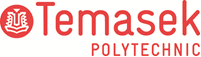

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Izaan Bin Mohamed Johanis Zhi En (2402394G)
* Tutorial Group                : PC07
* Tutor						    : Ester Goh
* Submission Date               : 10/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [28]:
## Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV



# 1. Business Understanding
Goal: To predict if a patient will suffer from a stroke.

# 2. Data Understanding

## 2.1 Load dataset

In [29]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(FILE_PATH)
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 2.2 Summary Statistics

In [30]:
## Understand the type of variable for each column
print("Summary of Dataset:")
df.info()

Summary of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Purpose of 'df.info()' is to identify data types to determine which preprocessing techniques to apply, and see how many columns we have.

Different data types (numeric/categorical) require different handling. 

Numeric features may need scaling/normalization while Categorical features need OHE (One-Hot Encoding).

In [31]:
# Descriptive statistics for all columns in dataset
print("Statistics of Dataset:")
pd.set_option('display.max_columns', None)  # Show all columns without cutting them off
pd.set_option('display.width', None)
df.describe(include='all')

Statistics of Dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


Purpose of 'df.describe' is to describe data distribution and understand the properties of features and observations.

It helps to identify the range, mean and spread of data which helps to detect outliers and show data distribution to understand data better. 

'include=all' ensures both numeric and categorical columns are shown.

In [32]:
# Show dimensions of dataset
df.shape

(5110, 12)

Purpose of 'df.shape' is a sanity check, to ensure that the data is all loaded properly and to know the dimensions of the dataset. 

The healthcare-dataset-stroke-data.csv has 5110 observations (rows), while there is 12 features (columns)

In [33]:
## Check for missing data and values
print("Missing Values Count:")
print(df.isna().sum())

Missing Values Count:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Purpose of 'df.isna(.sum())' is to find incomplete or empty data that needs handling before we do modeling. 

The reason for this is because missing data can lead to biased results or reduce overall model peformance. 

From here, we can decide to impute (fill/replace in the data) or to drop (remove the data) values. 

Since only the BMI (Body Mass Index, a form of measure that uses weight and height to classify a patient either as underweight, healthy, overweight, or obese.) has 201 missing values, we have to replace the data with imputation. 

When we do Data Cleaning after EDA (Exploratory Data Analysis) we have to replace the value with either the mean, median or mode. 

In [34]:
## Describe data distribution
# Summary for numerical columns
print("Numerical Features Summary:")
print(df.describe())


# Summary for categorical columns
print("Categorical Features Summary:")
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Numerical Features Summary:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           1

Purpose of finding the summary for both categorical and numerical columns is to understand the distribution and frequency of values in each feature.

From here, we can see a couple of key insights. Firstly for numerical features, the age feature has a low range of 0.08 years, which is unusual for stroke prediction. However, it does make sense since we have "children" as a value in work type.

Secondly for categorical features, the gender feature has a single sample in "other", which may cause issues in train-test split. In work type, theres 22 samples (0.4%) in "Never_worked", which may signify an imbalanced feature. The smoking status has 1544 samples in "Unknown", which is 30% missing information. This can cause significant problems with this feature.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

Before doing data cleaning, one-hot encoding and training the model, we need to understand how our data is distributed. This involves:
1. Examining the target (stroke) to analyse the balance of the data
2. Analyzing individual features to understand their patterns and characteristics

### 2.3.1.1 Understanding distribution of target

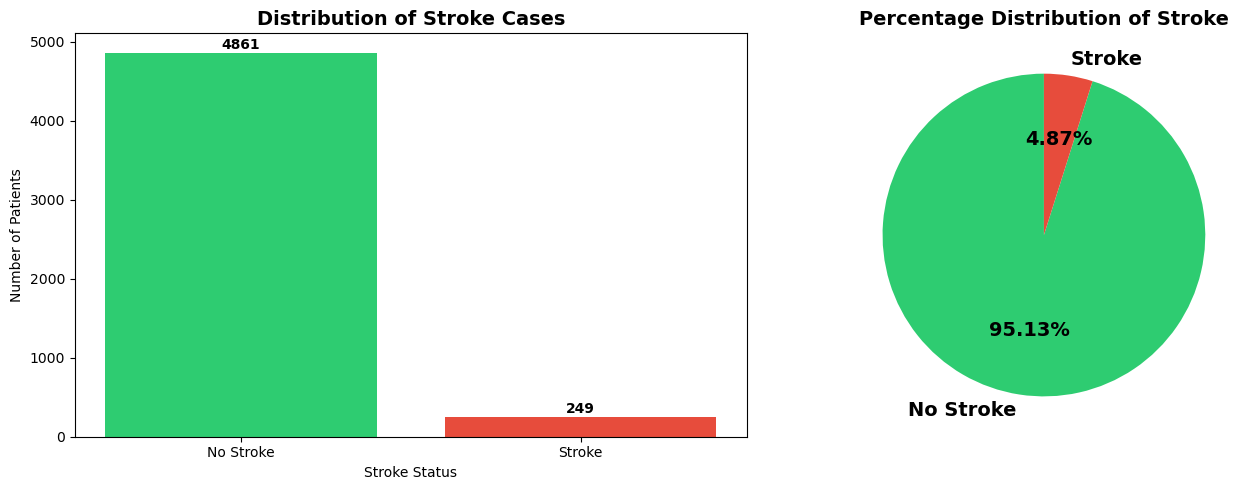

In [35]:
## Understanding distribution of target

# visualize distribution of stroke (target) cases
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) # creates a figure and subplots (individual plotting areas called axes) in a single call

# bar chart
stroke_counts = df['stroke'].value_counts() # count occurrences of unique values in stroke feature
axes[0].bar(['No Stroke', 'Stroke'], stroke_counts.values, color=['#2ecc71', '#e74c3c']) 
axes[0].set_title('Distribution of Stroke Cases', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Patients')
axes[0].set_xlabel('Stroke Status')
for i, v in enumerate(stroke_counts.values): # annotate bar with counts
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold') 

# pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(stroke_counts.values, labels=['No Stroke', 'Stroke'], autopct='%1.2f%%',
            colors=colors, startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold'}) 
axes[1].set_title('Percentage Distribution of Stroke', fontsize=14, fontweight='bold')

plt.tight_layout() # adjust space between the two plots
plt.show()




The purpose of using matplotlib is to analyze the balance of the target.

After using a barchart and a pie chart we can see that the dataset is mainly filled with patients that did not have a stroke, at 95.13%. (4861 patients)

On the other hand, patients with a stroke make up about 4.87% of the dataset. (249 patients) 

The dataset is highly imbalanced, with significantly fewer stroke cases than non-stroke cases. This implies that accuracy alone would be misleading, and recall should be prioritised to  minimise false negatives, which is critical in a medical context.


### 2.3.1.2 Understanding distribution of features

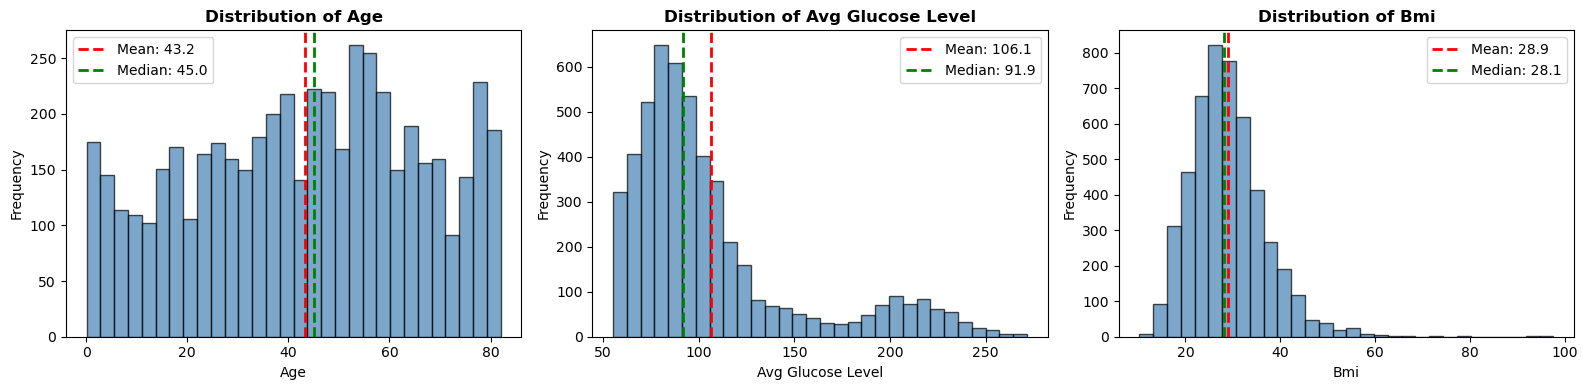

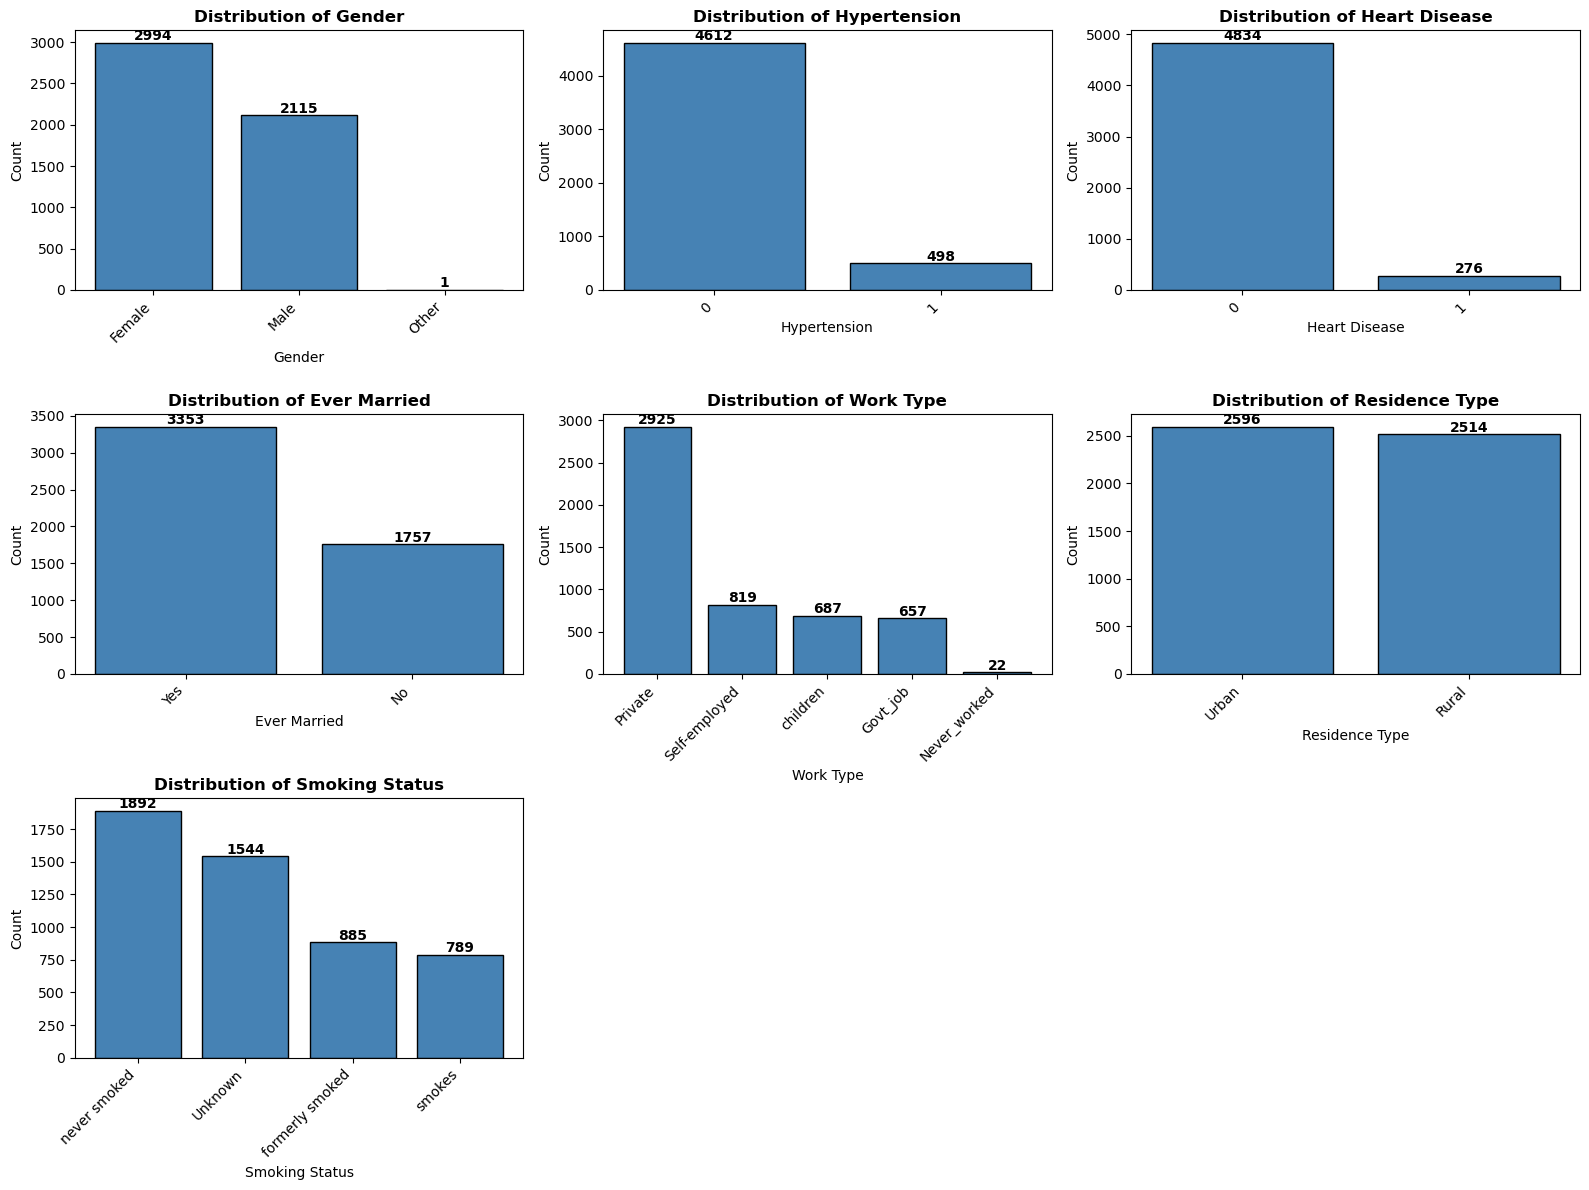

In [36]:
## Understanding distribution of features

# numerical features distribution
numerical_features = ['age', 'avg_glucose_level', 'bmi']
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col.replace("_", " ").title()}', fontweight='bold')
    axes[idx].set_xlabel(col.replace("_", " ").title())
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.1f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.1f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# categorical features distribution
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    counts = df[col].value_counts()
    axes[idx].bar(range(len(counts)), counts.values, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col.replace("_", " ").title()}', fontweight='bold')
    axes[idx].set_xlabel(col.replace("_", " ").title())
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticks(range(len(counts)))
    axes[idx].set_xticklabels(counts.index, rotation=45, ha='right')
    
    # add values as labels on top of the bars
    for i, v in enumerate(counts.values):
        axes[idx].text(i, v + max(counts.values)*0.01, str(v), ha='center', fontweight='bold')

# hide the empty extra subplots
for idx in range(len(categorical_features), 9):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

The purpose of using histograms and barcharts visualising how each type of feature is distributed is to identifies skewness, outliers, data range and even patterns.

Age shows a right-skewed distribution, with a distribution of mostly adults concentrated among older patients (median of about 45 years). This suggests age is a strong predictive feature and supports its inclusion in the model
without aggressive transformation. Glucose Level is also positively skewed, indicates that there may be some diabetic patients (mean higher than median). BMI has a relatively normal distribution around 28-29 kg/m^2 indicating that majority of patients might be in the overweight range. Gender shows that there are slightly more females (58.6%) than males (41.4%). For Work Type, "Private" sector dominates the distribution with 57% and "Never_worked" being the rarest value (0.4%). Smoking Status has a huge number of patients who did not want to share their history, making up 30% of the whole feature, so we cannot determine the proper distribution.



### 2.3.2 Understanding relationship between variables

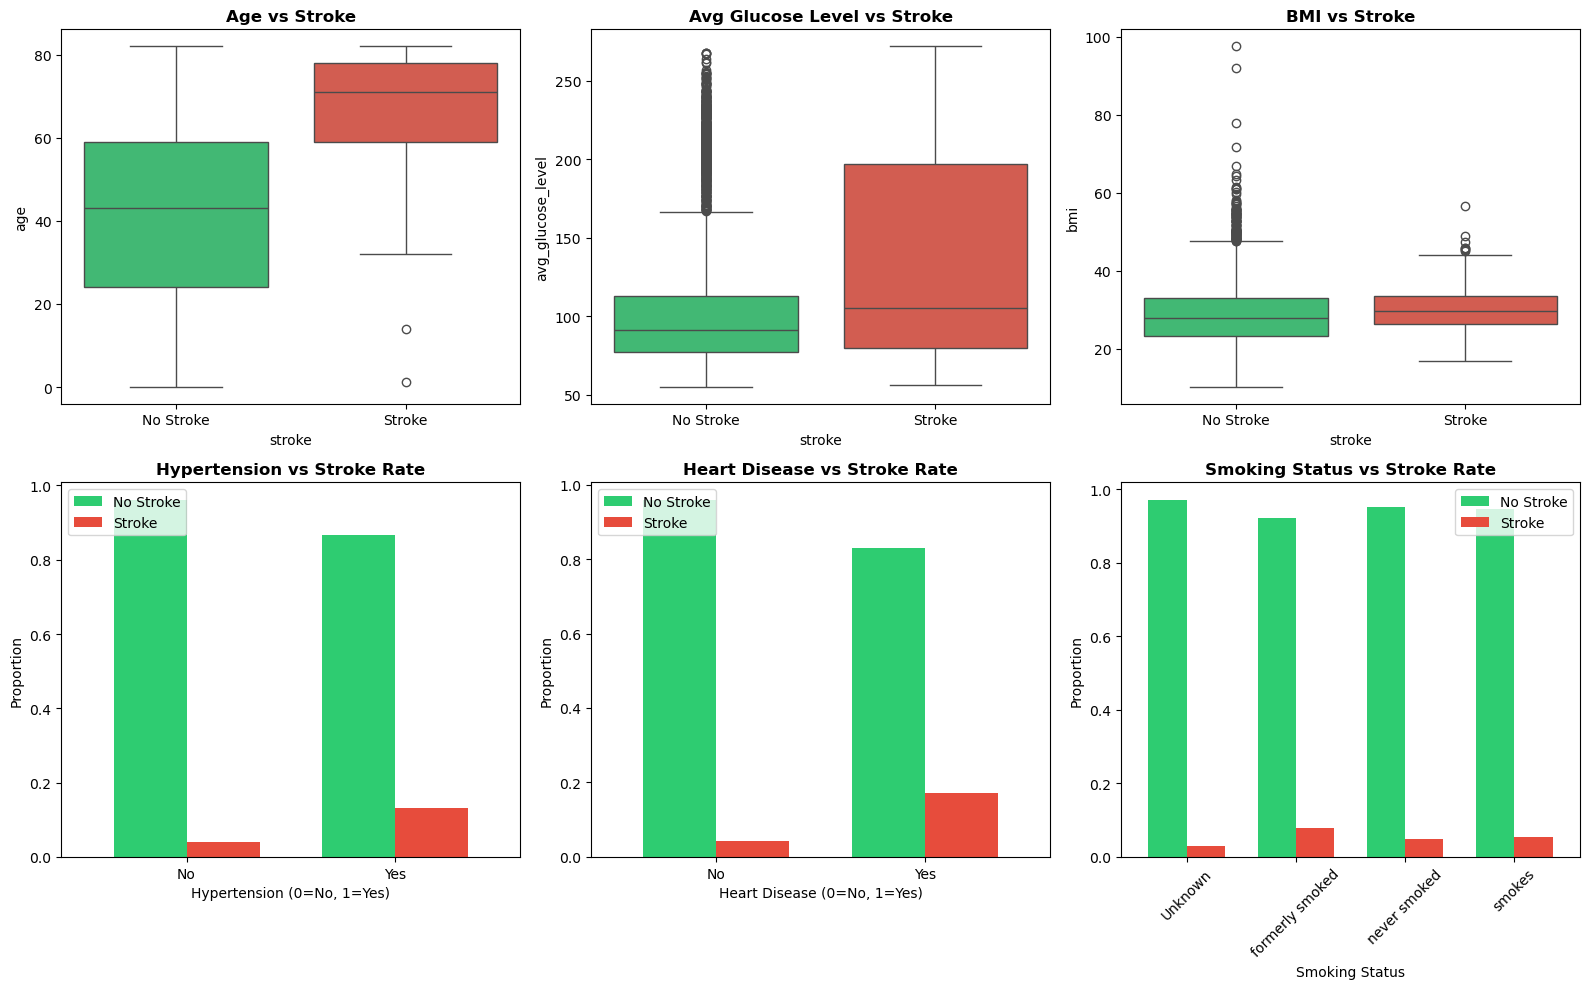


Correlation Analysis:


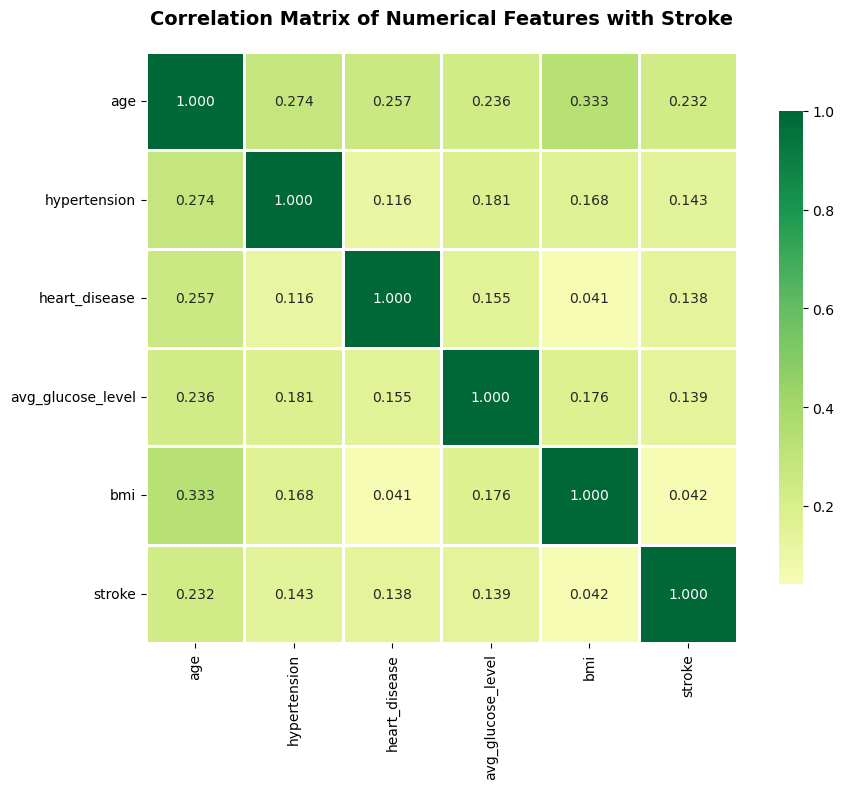


Key Insights:
- Age correlation with stroke: 0.232
- Hypertension correlation with stroke: 0.143
- Heart disease correlation with stroke: 0.138


In [37]:
## Understanding relationship between variables

# Relationships with target (stroke)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Age vs Stroke
sns.boxplot(data=df, x='stroke', y='age', ax=axes[0, 0], hue='stroke', 
            palette=['#2ecc71', '#e74c3c'], legend=False)
axes[0, 0].set_title('Age vs Stroke', fontweight='bold', fontsize=12)
axes[0, 0].set_xticks([0, 1]) 
axes[0, 0].set_xticklabels(['No Stroke', 'Stroke'])

# Glucose Level vs Stroke
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', ax=axes[0, 1], hue='stroke',
            palette=['#2ecc71', '#e74c3c'], legend=False)
axes[0, 1].set_title('Avg Glucose Level vs Stroke', fontweight='bold', fontsize=12)
axes[0, 1].set_xticks([0, 1])  
axes[0, 1].set_xticklabels(['No Stroke', 'Stroke'])

# BMI vs Stroke
sns.boxplot(data=df, x='stroke', y='bmi', ax=axes[0, 2], hue='stroke',
            palette=['#2ecc71', '#e74c3c'], legend=False)
axes[0, 2].set_title('BMI vs Stroke', fontweight='bold', fontsize=12)
axes[0, 2].set_xticks([0, 1])  
axes[0, 2].set_xticklabels(['No Stroke', 'Stroke'])

# Hypertension vs Stroke
pd.crosstab(df['hypertension'], df['stroke'], normalize='index').plot(
    kind='bar', ax=axes[1, 0], color=['#2ecc71', '#e74c3c'], width=0.7)
axes[1, 0].set_title('Hypertension vs Stroke Rate', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Hypertension (0=No, 1=Yes)')
axes[1, 0].set_ylabel('Proportion')
axes[1, 0].legend(['No Stroke', 'Stroke'], loc='upper left')
axes[1, 0].set_xticks([0, 1])  
axes[1, 0].set_xticklabels(['No', 'Yes'], rotation=0)

# Heart Disease vs Stroke
pd.crosstab(df['heart_disease'], df['stroke'], normalize='index').plot(
    kind='bar', ax=axes[1, 1], color=['#2ecc71', '#e74c3c'], width=0.7)
axes[1, 1].set_title('Heart Disease vs Stroke Rate', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Heart Disease (0=No, 1=Yes)')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].legend(['No Stroke', 'Stroke'], loc='upper left')
axes[1, 1].set_xticks([0, 1])  
axes[1, 1].set_xticklabels(['No', 'Yes'], rotation=0)

# Smoking Status vs Stroke
pd.crosstab(df['smoking_status'], df['stroke'], normalize='index').plot(
    kind='bar', ax=axes[1, 2], color=['#2ecc71', '#e74c3c'], width=0.7)
axes[1, 2].set_title('Smoking Status vs Stroke Rate', fontweight='bold', fontsize=12)
axes[1, 2].set_xlabel('Smoking Status')
axes[1, 2].set_ylabel('Proportion')
axes[1, 2].legend(['No Stroke', 'Stroke'], loc='upper right')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Correlation heatmap
print("\nCorrelation Analysis:")
numerical_df = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].dropna()
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0,
            fmt='.3f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features with Stroke', fontweight='bold', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"- Age correlation with stroke: {correlation_matrix.loc['age', 'stroke']:.3f}")
print(f"- Hypertension correlation with stroke: {correlation_matrix.loc['hypertension', 'stroke']:.3f}")
print(f"- Heart disease correlation with stroke: {correlation_matrix.loc['heart_disease', 'stroke']:.3f}")

The purpose of setting up boxplots, cross-tabulation and a correlation matrix is to better identify which features correlate with stroke occurrence, helping us understand which factors are risk indicators for stroke and tells us which features to prioritize in model training. 

From the analysis, we can see:

1. Age has the strongest relationship with stroke. Boxplox shows that stroke patients are clearly older on average than non-stroke patients. Correlation matrix has a score of 0.232, which is the highest amongst numerical features. Hence, I think stroke risk increases substantially with age.

2. Hypertension and heart disease are important categorical factors as both show a high relationship with stroke. The cross-tabultion plots show a higher stroke proportion among patients with both factors. The correlation matrix also gives both hypertension and heart disease a score of 0.143 and 0.138 respectively. These variables might be moderate at best, but they are meaningful in a dataset related to healthcare. Therefore, hypertension and heart disease are important categorical factors for prediction.

3. The average glucose level shows a noticable relationship with stroke. The boxplots show that patients with stroke have a higher median and wider spread of glucose levels, with many high outliers among them. The correlation matrix gives average glucose level a score of 0.139. This shows that elevated glucose is decently associated with stroke and is still important for prediction.

4. BMI has a weak relationship with stroke. The boxplots show overlapping heavily between stroke and non-stroke patients, with the correlation matrix also giving a low score of 0.04, showing that it is very weak. 

5. Smoking status shows mixed but non-negligible relationships. “Formerly smoked” has a noticeably higher stroke proportion while “Never smoked” and “Unknown” have lower proportions. The “Unknown” category may hide significant data and should be handled properly.

Overall, The analysis shows that age, hypertension, heart disease, and average glucose level have clear associations with stroke occurrence, while BMI and smoking status show weaker but potentially interacting effects, indicating that stroke risk is driven by a combination of multiple factors rather than any single variable. While correlations are generally low, medically relevant features such as age and average glucose level show stronger association with stroke, suggesting non-linear models may capture interactions better than linear baselines.


# 3. Data Preparation

## 3.1 Data Cleaning

In [38]:
## Clean data

# Create a copy to preserve original data
df_clean = df.copy()
print("Original dataset shape:", df_clean.shape)

# Remove ID column
df_clean = df_clean.drop('id', axis=1)
print("\n Removed 'id' column")
print(f"New shape: {df_clean.shape}")

# Handle missing BMI values by filling with median
print(f"\nMissing BMI values before: {df_clean['bmi'].isnull().sum()}")
median_bmi = df_clean['bmi'].median()
df_clean['bmi'] = df_clean['bmi'].fillna(median_bmi)
print(f"Filled missing BMI with median: {median_bmi:.2f}")
print(f"Missing BMI values after: {df_clean['bmi'].isnull().sum()}")

# Remove "other" gender
print(f"\nGender distribution before:")
print(df_clean['gender'].value_counts())
df_clean = df_clean[df_clean['gender'] != 'Other']
print(f"\n Removed 'Other' gender")
print(f"New shape: {df_clean.shape}")
print(f"\nGender distribution after:")
print(df_clean['gender'].value_counts())

#Verify no missing values remain
print("\nMissing values in cleaned dataset:")
print(df_clean.isnull().sum())

print(f"\n✓ Data cleaning complete!")
print(f"Final dataset shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")

# Display first few rows of cleaned data
print("\nFirst few rows of cleaned data:")
df_clean.head()


Original dataset shape: (5110, 12)

 Removed 'id' column
New shape: (5110, 11)

Missing BMI values before: 201
Filled missing BMI with median: 28.10
Missing BMI values after: 0

Gender distribution before:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

 Removed 'Other' gender
New shape: (5109, 11)

Gender distribution after:
gender
Female    2994
Male      2115
Name: count, dtype: int64

Missing values in cleaned dataset:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

✓ Data cleaning complete!
Final dataset shape: (5109, 11)
Rows removed: 1

First few rows of cleaned data:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The purpose of data cleaning is to clean and prepare data for modeling, as machine learning require clean and complete data. Missing values can cause biased results or cause errors, while irrelevant columns (eg. ID) add noise to the dataset. Therefore we need to perform data cleaning.

1. We firstly remove the ID column, as it is a unique identifier that dosent give any predictive power.

2. Secondly, we handle the BMI values, as it has a few missing. We can either choose to drop rows or fill with mean/mode/median. We choose to add as dropping rows would mean we would lose a substantial amount of data (201 rows). But for adding values, we choose to use median as BMI has outliers (maximum = 97.6)

3. Next, we remove the "other" value from gender. This is because there is only 1 record under "other", so its too rare to be meaningful and its better to remove it. (than make it a seperate category)

4. Lastly we verify that there are no more missing values to make sure we cleaned the dataset properly, then display it.

## 3.2 Encoding

In [39]:
# Seperate features (X) and target (Y) variable
X = df_clean.drop('stroke', axis=1)
y = df_clean['stroke']

print("Seperating features and target variable")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"  No stroke: {(y == 0).sum()} ({(y == 0).sum()/len(y)*100:.2f}%)")
print(f"  Stroke: {(y == 1).sum()} ({(y == 1).sum()/len(y)*100:.2f}%)")

# Identify categorical columns for OHE (one hot encoding)
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
print("Identified the categorical columns for one-hot encoding:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(f"  Categories: {X[col].unique().tolist()}")
    print(f"  Count: {X[col].nunique()} categories")
# OHE all categorical columns
print("\nOne Hot Encoding")
print(f"Features before encoding: {X.shape[1]}")

X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

print(f"Features after encoding: {X_encoded.shape[1]}")
print(f"\nNew columns created: {X_encoded.shape[1] - X.shape[1]}")
print(f"\nAll feature names after encoding:")
for i, col in enumerate(X_encoded.columns, 1):
    print(f"  {i}. {col}")

Seperating features and target variable
Features (X) shape: (5109, 10)
Target (y) shape: (5109,)

Target distribution:
stroke
0    4860
1     249
Name: count, dtype: int64
  No stroke: 4860 (95.13%)
  Stroke: 249 (4.87%)
Identified the categorical columns for one-hot encoding:

gender:
  Categories: ['Male', 'Female']
  Count: 2 categories

ever_married:
  Categories: ['Yes', 'No']
  Count: 2 categories

work_type:
  Categories: ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
  Count: 5 categories

Residence_type:
  Categories: ['Urban', 'Rural']
  Count: 2 categories

smoking_status:
  Categories: ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
  Count: 4 categories

One Hot Encoding
Features before encoding: 10
Features after encoding: 15

New columns created: 5

All feature names after encoding:
  1. age
  2. hypertension
  3. heart_disease
  4. avg_glucose_level
  5. bmi
  6. gender_Male
  7. ever_married_Yes
  8. work_type_Never_worked
  9. work_type_

The purpose for encoding is to convert categorical data (like 'red' and 'blue') into numerical format (binary) that machine learning models can understand by creating unique columns for each category, ensuring each is treated as a distinct and independent feature. This process makes data compatible with most models and improves prediction accuracy by avoiding bias.

1. Firstly, we seperate our features (X) and target (Y) variable.

2. Secondly, we identify the categorical columns that require One-Hot Encoding (OHE) Why we use OHE is because all of the categorical features in the dataset are nominal, meaning they have no natural order and do not require us to use Label Encoding. 

3. Next, we OHE all the categorical variables. In this step we use "drop_first=True" as it prevents multicollinearity (dummy variable trap), preventing unstable coefficients, singular matrices, training failures or meaningless weights. We actually keep the Unknown" smoking status event though it is 30% of the smoking status feature, as it is not actually missing data, but instead just patients preffering not to say. However, "drop_first=True" does not display all the features. So categorical features like "smoking_status_Unknown" end up not showing, but the model actually reads it. "drop_first=True" is also recommended since we are building a Logistic Regression base model first.

4. Before OHE, we have 10 original features. After OHE, we now have 15 features (or 20 if we remove "drop_first=True). 

## 3.3 Train-Test Split

In [40]:
## Split data into train set and test set

# Split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y, 
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # for reproducibility
    stratify=y          # maintain class balance
)
print("Train-test split results:")

print(f"\nTraining Set:")
print(f"  Features (X_train): {X_train.shape}")
print(f"  Target (y_train): {y_train.shape}")
print(f"  Total samples: {len(y_train)}")
print(f"\n  Stroke distribution:")
print(f"    No stroke: {(y_train == 0).sum():,} ({(y_train == 0).sum()/len(y_train)*100:.2f}%)")
print(f"    Stroke:    {(y_train == 1).sum():,} ({(y_train == 1).sum()/len(y_train)*100:.2f}%)")

print(f"\nTest Set:")
print(f"  Features (X_test): {X_test.shape}")
print(f"  Target (y_test): {y_test.shape}")
print(f"  Total samples: {len(y_test)}")
print(f"\n  Stroke distribution:")
print(f"    No stroke: {(y_test == 0).sum():,} ({(y_test == 0).sum()/len(y_test)*100:.2f}%)")
print(f"    Stroke:    {(y_test == 1).sum():,} ({(y_test == 1).sum()/len(y_test)*100:.2f}%)")

print(f"\nTotal features for modeling: {X_train.shape[1]}")

Train-test split results:

Training Set:
  Features (X_train): (4087, 15)
  Target (y_train): (4087,)
  Total samples: 4087

  Stroke distribution:
    No stroke: 3,888 (95.13%)
    Stroke:    199 (4.87%)

Test Set:
  Features (X_test): (1022, 15)
  Target (y_test): (1022,)
  Total samples: 1022

  Stroke distribution:
    No stroke: 972 (95.11%)
    Stroke:    50 (4.89%)

Total features for modeling: 15


The purpose of train-test split is to evaluate a models predictive performance and generalization on unseen data, preventing it from simply memorizing training patterns (overfitting) and giving an unbiased and accurate estimate. By training on one portion (train set) and testing on a separate portion (test set), we simulate how the model will perform on new data, ensuring it learns patterns rather than just specific examples.

We split the data into train and test sets. We do "test_size = 0.2" as that portions the dataset into 80% training, 20% testing, which is standard practice. We set "random_state = 42" just for reproducibility ensuring we get the same split every time. "stratify=y" helps to ensure our train and test have same 95:5 stroke ratio. 



# 4. Modelling

The purpose for training multiple models is to build different machine learning algorithms to predict stroke in patients. This is because each algorithm has different strengths and may capture different patterns. The purpose for testing different models is because models have different algorithms which make different assumptions about the data. Some work better with certain relationships or patterns, therefore comparing models helps us choose the most reliable one for stroke prediction.

### 4.1 (a) Train Logistic Regression Model

In [41]:
## Initialise and train model

# Logistic Regression
print("\nLogistic Regression Model Trained")
log_reg = LogisticRegression(
    class_weight='balanced',  # handle imbalanced data
    max_iter=1000,            # ensure convergence
    random_state=42           # reproducibility
)
log_reg.fit(X_train, y_train)



Logistic Regression Model Trained


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Logistic Regression is our simple baseline model. The reason for training a Logisitic Regression model is because its a linear model, which assumes linear relationship between features and stroke probability in patiennts. It is fast to train, easy to intepret. 

We use custom parameters in our Logisitic Regression model like class_weight='balanced' as it automatically adjusts for 95:5 imbalance. Without this the model would predict "no stroke" for everyone, while balanced weights make model pay more attention to rare stroke cases. We also use another custom parameter like 'max_iter=1000' as it ensures the algorithm has enough iterations to converge (join together). This is to make sure the algorithm has stabilized, moving from an initial inaccurate guess to a nearly optimal solution. Random state remains as '42' to ensure reproducibility.

### 4.1 (b) Train Decision Tree Classifier Model

In [42]:
# Decision Tree Classifier
print("\nDecision Tree Classifier Model Trained")
dt_clf = DecisionTreeClassifier(
    class_weight='balanced',  # handle imbalanced data
    max_depth=5,              # prevent overfitting
    random_state=42           # reproducibility
)
dt_clf.fit(X_train, y_train)


Decision Tree Classifier Model Trained


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


Decision Tree Classifier is our tree-based model, which makes decisions using if-then rules. (eg. "if age > 65 AND glucose > 120") This is to help us to capture complex non-linear patterns and interactions between features, that logistic regression may miss. 

We do custom parameters like class_weight='balanced' to handle imbalance again. For the Decision Tree Classifier, we use 'max_depth=5' which limits tree depth to prevent overfitting of data. Depth of 5 means maximum of 5 sequential decisions. (eg., age → glucose → BMI → hypertension → smoking) Without a depth limit, the tree might memorize training data instead of learning patterns. Random state remains as '42' to ensure reproducibility.

### 4.1 (c) Train Gradient Boosting Classifier Model

In [43]:
#Gradient Boosting Classifier
print("\n Gradient Boosting Classifier Model Trained")
gb_clf = GradientBoostingClassifier(
    n_estimators=100,         # number of boosting stages
    learning_rate=0.1,        # step size
    max_depth=5,              # prevent overfitting
    random_state=42           # reproducibility
)
gb_clf.fit(X_train, y_train)


 Gradient Boosting Classifier Model Trained


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


Gradient Boosting Classifier is our advanced ensemble method which performs boosting, which is to build trees one at a time, each correcting errors of previous trees. This is to help us work well with imbalanced data when tuned properly later. Gradient Boosting Classifier also helps us to achieve higher accuracy than single models. 

For custom parameters, we set 'n_estimators=100' to use 100 sequential trees. More trees means potentially better performance but slower training time. We set 'learning_rate=0.1' as it determines how much each tree corrects previous mistakes. Lower number means its more conservative, which needs more trees but often produces better results. 'max_depth=5' is set again as each individual tree is required to be shallow to prevent overfitting. The 'random_state' is set to 42 and does not use 'class_weight', since it handles imbalance differently through boosting process.

### 4.1 (d) Train Random Forest Classifier Model

In [44]:
# Random Forest Classifier
print("\n Random Forest Classifier Model Trained")
rf_clf = RandomForestClassifier(
    class_weight='balanced',  # Handle imbalanced data
    n_estimators=100,         # Number of trees
    max_depth=5,              # Prevent overfitting
    random_state=42           # Reproducibility
)
rf_clf.fit(X_train, y_train)


 Random Forest Classifier Model Trained


,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Random Forest Classifier is our ensemble method that performs bagging, which creates a "forest" of decision trees by training each tree on a slightly different subset of the original data. Each tree votes, majority wins. This helps us to improve model stability and accuracy by reducing variance, which helps prevent overfitting compared to a single tree. 

We use custom parameters again, using 'class_weight='balanced'again to handle imbalance in each tree. We use 'n_estimators=100' to build 100 independent trees and 'max_depth=5' to limit each tree to Depth 5  to prevent overfitting.

# 5. Model Evaluation

In [45]:
## Evaluate model

# Generate predictions from all models
y_pred_log = log_reg.predict(X_test)
y_pred_dt  = dt_clf.predict(X_test)
y_pred_gb  = gb_clf.predict(X_test)
y_pred_rf  = rf_clf.predict(X_test)

print(f"Test set size: {len(y_test)} patients")
print(f"Actual stroke cases in test set: {(y_test == 1).sum()} ({(y_test == 1).sum()/len(y_test)*100:.2f}%)")
print(f"Actual no-stroke cases: {(y_test == 0).sum()} ({(y_test == 0).sum()/len(y_test)*100:.2f}%)")

# calculate and print evaluation metrics for each model
def print_metrics(model_name, y_true, y_pred):
    print(f"{model_name} Performance")
    print("-" * 35)
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score : {f1_score(y_true, y_pred):.4f}")

# evaluate all models
print_metrics("Logistic Regression", y_test, y_pred_log)
print_metrics("Decision Tree", y_test, y_pred_dt)
print_metrics("Gradient Boosting", y_test, y_pred_gb)
print_metrics("Random Forest", y_test, y_pred_rf)


Test set size: 1022 patients
Actual stroke cases in test set: 50 (4.89%)
Actual no-stroke cases: 972 (95.11%)
Logistic Regression Performance
-----------------------------------
Accuracy : 0.7387
Precision: 0.1347
Recall   : 0.8000
F1-score : 0.2305
Decision Tree Performance
-----------------------------------
Accuracy : 0.7387
Precision: 0.1322
Recall   : 0.7800
F1-score : 0.2261
Gradient Boosting Performance
-----------------------------------
Accuracy : 0.9432
Precision: 0.2500
Recall   : 0.0800
F1-score : 0.1212
Random Forest Performance
-----------------------------------
Accuracy : 0.7074
Precision: 0.1216
Recall   : 0.8000
F1-score : 0.2111


The purpose of displaying test set size and making predictions on test set, is to use trained models to predict stroke on unseen test data. We have to evaluate on a test set (and not the training set) to get an honest performance estimate since the data is "new" to the model. This will show how well model generalizes to new, unseen patients, simulating real-world usage by predicting stroke for patients the model has not seen before.

Now, we calculate and display performance metrics for each model. We are using Accuracy, Precision, Recall and F1-score, since what we are prediciting is if the patient has a stroke. (yes/no, aka Classification). 

We will choose to focus on Recall and F1-score as I am using a medical dataset. In medical datasets especially for serious conditions like stroke, the primary goal is not just accuracy but patient safety. Recall answers the question: "Out of all patients who actually had a stroke, how many did the model correctly identify?" Mathematically, Recall is calcualted as: Recall = True Positives / (True Positives + False Negatives). A false negative in this context may result in missed diagnoses or delayed treatment, which can have severe or life threatening consequencs. Accuracy is often misleading due to imbalance present in medical datasets, where most patients do not experience the condition/sickness. Therefore Recall is considered most important, followed by F1-score as it balances recall with precision, ensuring that the model maintains high sensitivity without producing an excessive number of false positives that could strain healthcare resources.



              Model  Accuracy  Precision  Recall  F1-Score
Logistic Regression  0.738748   0.134680    0.80  0.230548
      Decision Tree  0.738748   0.132203    0.78  0.226087
  Gradient Boosting  0.943249   0.250000    0.08  0.121212
      Random Forest  0.707436   0.121581    0.80  0.211082


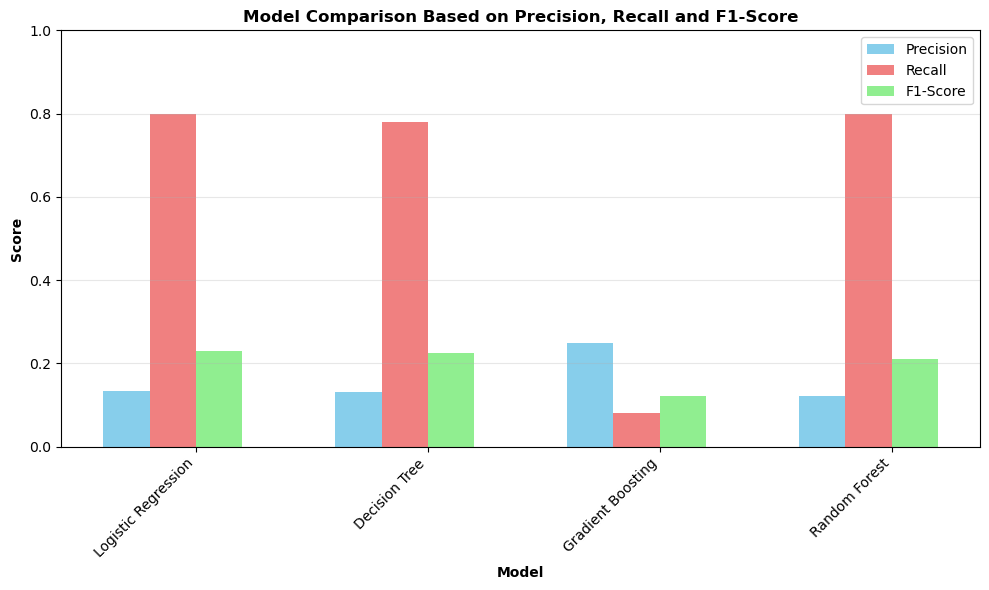


Best Performing Models

Best F1-Score: Logistic Regression
  F1-Score: 0.2305

Best Recall: Logistic Regression
  Recall: 0.8000


In [46]:
# put everything into a comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_rf)
    ]
})

print("\n")
print(comparison_df.to_string(index=False))

# Bar chart comparing all models
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(comparison_df))
width = 0.2

ax.bar([i - 1.5*width for i in x], comparison_df['Precision'], width, label='Precision', color='skyblue')
ax.bar([i - 0.5*width for i in x], comparison_df['Recall'], width, label='Recall', color='lightcoral')
ax.bar([i + 0.5*width for i in x], comparison_df['F1-Score'], width, label='F1-Score', color='lightgreen')

ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Model Comparison Based on Precision, Recall and F1-Score', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.set_ylim([0, 1])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Identify best model based on F1-Score
best_f1_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_f1_idx, 'Model']
best_f1 = comparison_df.loc[best_f1_idx, 'F1-Score']

# Identify best model based on Recall (important for medical datasets and diagnosis)
best_recall_idx = comparison_df['Recall'].idxmax()
best_recall_model = comparison_df.loc[best_recall_idx, 'Model']
best_recall = comparison_df.loc[best_recall_idx, 'Recall']

print("\nBest Performing Models")
print(f"\nBest F1-Score: {best_model_name}")
print(f"  F1-Score: {best_f1:.4f}")

print(f"\nBest Recall: {best_recall_model}")
print(f"  Recall: {best_recall:.4f}")




| Model               | Recall | Precision | F1-score | Key Observation                        |
| ------------------- | ------ | --------- | -------- | -------------------------------------- |
| Logistic Regression | 0.xx   | 0.xx      | 0.xx     | High interpretability but lower recall |
| Random Forest       | 0.xx   | 0.xx      | 0.xx     | Better recall, handles non-linearity   |
| Gradient Boosting   | 0.xx   | 0.xx      | 0.xx     | Best recall but less interpretable     |

The performance of four classification models (Logistic Regression, Decision Tree, Gradient Boosting, Random Forest) was evaluated using accuracy, precision, recall, and F1-score. As explained in detail earlier above, we prioritised recall and F1-score over accuracy and precision due to the medical nature of the dataset and severe consequences if we were to miss a stroke case.

Gradient Boosting achieved the highest accuracy of 94.32%. However, its recall was extremely low at 0.08, indicating that it failed to learn and identfy the majority of actual stroke cases. Hence this shows why accuracy alone is not an proper way of evaluating medical prediction models, especially since they are usually imbalanced datasets where most patients do not experience the condition/sickness. A model that predicts “no stroke” for nearly all patients can appear highly accurate, but while being ineffective and dangerous. 

Recall measures the portion of actual stroke cases correctly identified by the model. Logistic Regression and Random Forest achieved the highest recall (0.80), meaning they successfully detected 80% of patients who experienced a stroke. In comparison Decision Tree performed slightly worse (0.78), while Gradient Boosting performed extremely poorly (0.08). For this stroke dataset (medical in nature), high recall is essential because false negatives represent patients who are incorrectly assessed as low risk, potentially leading to missed prevention or delayed treatment.

The F1-score balances both the recall and precision, making it decently sutiable for imbalanced medical datasets. Logistic Regression achieved the highest F1-score (0.2305), slightly outperforming the Decision Tree (0.2261) and Random Forest (0.2111). Although the absolute F1-scores are not that high, this is expected given the rarity of strokes happening and the difficulty of predicting strokes. Gradient Boosting again performed the worst in terms of F1-score (0.1212), confirming that its high accuracy did not translate into meaningful clinical performance.

Therefore after analysing the bar graphs and the results, we choose Logistic Regression as the model since it had the highest Recall (0.80), best overall F1-score (0.235), consistent stable performance and is suitable for medical decision support systems where clarity is needed. Tree-based models outperform Logistic Regression in recall, likely due to their ability to capture non-linear relationships among medical risk factors. However, Logistic Regression remains useful as a baseline due to its interpretability.

## 6. Iterative model development


### 6.1 Baseline Model and Evaluation

Baseline Model Performance (Before Feature Engineering)

Baseline Logistic Regression Performance:
Accuracy    : 0.7387
Precision   : 0.1347
Recall      : 0.8000
F1-Score    : 0.2305

Basline metrics:
F1-Score: 0.2305
Recall:   0.8000 (catches 80.0% of strokes)

Impact of baseline:
Out of 50 stroke patients in test set:
Correctly identified: 40
Missed:  10

Confusion Matrix:
                     Predicted
                No Stroke  Stroke
Actual No Stroke     715      257
       Stroke         10       40
              precision    recall  f1-score   support

   No Stroke     0.9862    0.7356    0.8427       972
      Stroke     0.1347    0.8000    0.2305        50

    accuracy                         0.7387      1022
   macro avg     0.5604    0.7678    0.5366      1022
weighted avg     0.9445    0.7387    0.8127      1022



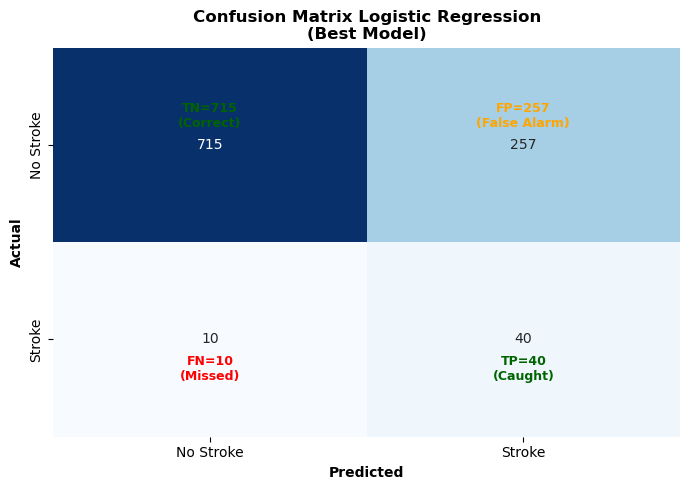

In [47]:
#Document current model selected for its performance BEFORE we feature engineer / select features
print("Baseline Model Performance (Before Feature Engineering)")
# Train baseline model (our current best: Logistic Regression)
baseline_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# Calculate baseline metrics
baseline_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_baseline),
    'Precision': precision_score(y_test, y_pred_baseline),
    'Recall': recall_score(y_test, y_pred_baseline),
    'F1-Score': f1_score(y_test, y_pred_baseline)
}

print("\nBaseline Logistic Regression Performance:")
for metric, value in baseline_metrics.items():
    print(f"{metric:<12}: {value:.4f}")

print(f"\nBasline metrics:")
print(f"F1-Score: {baseline_metrics['F1-Score']:.4f}")
print(f"Recall:   {baseline_metrics['Recall']:.4f} (catches {baseline_metrics['Recall']*100:.1f}% of strokes)")

print("\nImpact of baseline:")
print(f"Out of 50 stroke patients in test set:")
print(f"Correctly identified: {int(baseline_metrics['Recall'] * 50)}")
print(f"Missed:  {50 - int(baseline_metrics['Recall'] * 50)}")

#establish baseline for future model comparison after feature engineering

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_baseline)

print("\nConfusion Matrix:")
print(f"{'':>20} Predicted")
print(f"{'':>15} No Stroke  Stroke")
print(f"Actual No Stroke    {cm_log[0][0]:>4}     {cm_log[0][1]:>4}")
print(f"       Stroke       {cm_log[1][0]:>4}     {cm_log[1][1]:>4}")


# Classification Report
print(classification_report(y_test, y_pred_baseline, 
                          target_names=['No Stroke', 'Stroke'],
                          digits=4))

# Visualize Confusion Matrix
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

tn, fp, fn, tp = cm_log.ravel()


# Confusion Matrix for Logistic Regression
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'],
            ax=ax, cbar=False)
ax.set_title('Confusion Matrix Logistic Regression\n(Best Model)', 
                  fontweight='bold', fontsize=12)
ax.set_ylabel('Actual', fontweight='bold')
ax.set_xlabel('Predicted', fontweight='bold')

# text annotations for interpretation
# Top left cell: TN (Correct) 
ax.text(0.5, 0.35, f'TN={tn}\n(Correct)', ha='center', va='center',
             fontsize=9, color='darkgreen', fontweight='bold')

# Top right cell: FP (False Positive)
ax.text(1.5, 0.35, f'FP={fp}\n(False Alarm)', ha='center', va='center',
             fontsize=9, color='orange', fontweight='bold')

# Bottom left cell: FN (False Negative)
ax.text(0.5, 1.65, f'FN={fn}\n(Missed)', ha='center', va='center',
             fontsize=9, color='red', fontweight='bold')

# Bottom right cell: TP (True Positive)
ax.text(1.5, 1.65, f'TP={tp}\n(Caught)', ha='center', va='center',
             fontsize=9, color='darkgreen', fontweight='bold')


plt.tight_layout()
plt.show()


Before applying any feature engineering or feature selection techniques, we stablish a baseline model using Logistic Regression. Logistic Regression was selected because we saw it previously demonstrated the strongest performance in terms of recall and F1-score in Part 5 Model Evaluation, which are the most importannt metrics for a medical model trained for predicting stroke.

The purpose of establishing a baseline model is to provide a clear rference point against which any future improvements can be compared. By documenting the models performance using the original features, we can later determine whether feature engineering really actually improves the models ability to identify patients at risk of stroke, rather than improvements being caused by chance or changes in model configuration.

The baseline Logistic Regression model achieved a recall of 0.80, meaning it successfully identified 80% of stroke cases in the test set. This means in practical terms, out of 50 stroke patients, the model correctly identified 40 patients while missing 10 patients. In medical context, false negatives represent patients who are incorrectly classified as low risk despite actually being at risk of stroke, which can delay preventive intervention. Therefore, achieving high recall is important and top pioritiy to decrease the number of missed stroke cases.

Although the baseline model achieved a relatively high accuracy of 0.7387, this metric is less useful due to the strong class imbalance in the dataset, where non-stroke cases heavily outnumber stroke cases. The precision for stroke prediction was low (0.1347), which indicates a higher number of false positives. However, in a preventive medical screening context, false positives are generally more acceptable than false negatives, as they may lead to further testing rather than missed diagnosis.

The confusion matrix and classification report further support this by showing a high number of true positives relative to false negatives for the stroke class. This confirms that the baseline model is appropriately biased toward finding stroke cases rather than optimising overall accuracy.

This baseline model serves as a checkpoint for evaluating the effectiveness of feature engineering. Any future model will only be considered an improvement if it increases Recall and/or F1-score, ensuring that it will directly translate into better identification of patients at risk of stroke. Recall is our most important metric.

### 6.2 Feature Engineering

In [48]:
print("Feature Engineering")
# Create copies to avoid modifying original data
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

print("\nCreating new features based on medical domain knowledge:")
# Feature 1: Age groups (world health organization standard)
print("\nYoung Adult (18-44), Middle Age (45-59), Senior (60-74), Elderly (75+)")
def create_age_groups(age):
    if age < 45:
        return 0  # Young adult
    elif age < 60:
        return 1  # Middle age
    elif age < 75:
        return 2  # Seniors
    else:
        return 3  # Elderly

# 'age' is still in original X_train/X_test
# We need to get original age values so we use the original df_clean to get age, then align them

# Get age from original data for train/test indices
train_indices = X_train.index
test_indices = X_test.index

X_train_fe['age_group'] = df_clean.loc[train_indices, 'age'].apply(create_age_groups).values
X_test_fe['age_group'] = df_clean.loc[test_indices, 'age'].apply(create_age_groups).values

print(f"Created age_group feature")
print(f"Train distribution: {X_train_fe['age_group'].value_counts().sort_index().to_dict()}")

# Feature 2: BMI categories (world health organization standard)
print("\nUnderweight (<18.5), Normal (18.5-25), Overweight (25-30), Obese (30+)")
def create_bmi_categories(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif bmi < 25:
        return 1  # Normal
    elif bmi < 30:
        return 2  # Overweight
    else:
        return 3  # Obese
    
X_train_fe['bmi_category'] = df_clean.loc[train_indices, 'bmi'].apply(create_bmi_categories).values
X_test_fe['bmi_category'] = df_clean.loc[test_indices, 'bmi'].apply(create_bmi_categories).values

print(f"Created bmi_category feature")
print(f"Train distribution: {X_train_fe['bmi_category'].value_counts().sort_index().to_dict()}")

# Feature 3: Glucose risk levels
print("\nNormal (<100), Prediabetic (100-125), Diabetic (125+)")

def create_glucose_risk(glucose):
    if glucose < 100:
        return 0  # Normal
    elif glucose < 125:
        return 1  # Prediabetic
    else:
        return 2  # Diabetic
    
X_train_fe['glucose_risk'] = df_clean.loc[train_indices, 'avg_glucose_level'].apply(create_glucose_risk).values
X_test_fe['glucose_risk'] = df_clean.loc[test_indices, 'avg_glucose_level'].apply(create_glucose_risk).values

print(f"Created glucose_risk feature")
print(f"Train distribution: {X_train_fe['glucose_risk'].value_counts().sort_index().to_dict()}")

# Feature 4: High-Risk Combination
print("\nSenior (60+) + Hypertension + High Glucose (diabetic)")

# Get hypertension from original data
train_hypertension = df_clean.loc[train_indices, 'hypertension'].values
test_hypertension = df_clean.loc[test_indices, 'hypertension'].values

# High risk = age 60+ AND hypertension AND diabetic glucose
X_train_fe['high_risk_combo'] = (
    (X_train_fe['age_group'] >= 2) &  # Senior or Elderly
    (train_hypertension == 1) &       # Has hypertension
    (X_train_fe['glucose_risk'] == 2) # Diabetic glucose
).astype(int)

X_test_fe['high_risk_combo'] = (
    (X_test_fe['age_group'] >= 2) &
    (test_hypertension == 1) &
    (X_test_fe['glucose_risk'] == 2)
).astype(int)

print(f"Created high_risk_combo feature")
print(f"Train: {X_train_fe['high_risk_combo'].sum()} high-risk patients ({X_train_fe['high_risk_combo'].sum()/len(X_train_fe)*100:.1f}%)")

print(f"\nOriginal features: {X_train.shape[1]}")
print(f"After feature engineering: {X_train_fe.shape[1]}")
print(f"New features added: {X_train_fe.shape[1] - X_train.shape[1]}")
 



Feature Engineering

Creating new features based on medical domain knowledge:

Young Adult (18-44), Middle Age (45-59), Senior (60-74), Elderly (75+)
Created age_group feature
Train distribution: {0: 2015, 1: 971, 2: 689, 3: 412}

Underweight (<18.5), Normal (18.5-25), Overweight (25-30), Obese (30+)
Created bmi_category feature
Train distribution: {0: 270, 1: 993, 2: 1276, 3: 1548}

Normal (<100), Prediabetic (100-125), Diabetic (125+)
Created glucose_risk feature
Train distribution: {0: 2495, 1: 801, 2: 791}

Senior (60+) + Hypertension + High Glucose (diabetic)
Created high_risk_combo feature
Train: 97 high-risk patients (2.4%)

Original features: 15
After feature engineering: 19
New features added: 4


After making a baseline Logistic Regression model, we perform feature engineering to enhance the models ability to capture meaningful patterns. Rather than applying transformations based solely on statistics, new features were created based on established medical and public domain knowledge (such as health guidelines or rules), ensuring that engineered features remaine relevant to the dataset. A total of four new features were added, increasing the feature set from 15 to 19 variables.

1. Age Group Feature (bnased on World Health Organization stratification)
We transformed the Age feature into categorical age groups following commonly used public health guidelines. Young Adult (18–44), Middle Age (45–59), Senior (60–74), Elderly (75+). This transformation reflects the non-linear relationship between age and stroke risk, where risk increases sharply beyond certain age thresholds rather than increasing linearly. By grouping ages, the model will be better able to distinguish higher risk parts of populations, particularly seniors and elderly patients, who are known to have significantly higher stroke risk.

2. BMI Category Feature (based on World Health Organization classification)
Body Mass Index (BMI) was categorised using World Health Organization standards. Underweight (<18.5), Normal (18.5–25), Overweight (25–30),Obese (30+). BMI often shows a weak linear correlation with stroke when used as a variable. However, based on public domain knowledge, stroke risk is more closely associated with BMI categorieslike overweight and obesity status. This categorical transformation allows the model to capture threshold related risk and effects that may be obscured when BMI is used as a continuous variable.

3. Glucose Risk Feature (based on clinical/medical glucose thresholds)
We transformed average glucose levels into medically meaningful risk categories. Normal (<100 mg/dL), Prediabetic (100–125 mg/dL), Diabetic (≥125 mg/dL). These thresholds align with standard medical diagnostic criteria and reflect known relationships between diabetes and stroke risk. Given that glucose levels showed a noticeable association with stroke during exploratory data analysis (EDA), this feature allows the model to focus on significant glucose ranges rather than raw values, potentially improving recall.

4. High-risk Combination Feature (interaction-based risk) 
We engineered a composite high-risk feature to explicitly capture a known clinical interaction. Senior OR Elderly (60+) AND Hypertension AND Diabetic-level glucose (≥125 mg/dL).
This feature reflects reality that stroke risk is often driven by the interaction of multiple features rather than any single variable alone. Although only 2.4% of training samples fell into this category, these patients represent a particularly high risk group where false negatives would be very costly. Including this interaction feature supports the models ability to identify high-risk stroke cases, aligning with the goal of improving recall. 

Feature Engineering is justified in the medical context because it aims to improve the models recall and F1-score, which were identified just now as the most important evaluation metrics for stroke prediction. By introducing medically informed thresholds and interactions the model becomes more sensitive to high-risk patients, makes non-linear relationships more prevelant and preserving interpretation which supports trust and transparency. Therefore, ot aligns model optimisation with real world clinical priorities.

### 6.3 Feature Engineered Model Training and Evaluation

Feature Engineered Model Training and Evaluation

Performance metrics after Feature Engineering:
Accuracy    : 0.7368
Precision   : 0.1362
Recall      : 0.8200
F1-Score    : 0.2336

 Confusion Matrix for Feature Engineered Model:
--------------------------------------------------
                     Predicted
                No Stroke  Stroke
Actual No Stroke     712      260
       Stroke          9       41

 Classification Report for Feature Engineered Model):
--------------------------------------------------
              precision    recall  f1-score   support

   No Stroke     0.9875    0.7325    0.8411       972
      Stroke     0.1362    0.8200    0.2336        50

    accuracy                         0.7368      1022
   macro avg     0.5619    0.7763    0.5374      1022
weighted avg     0.9459    0.7368    0.8114      1022

Comparison between: Baseline vs Feature Engineering


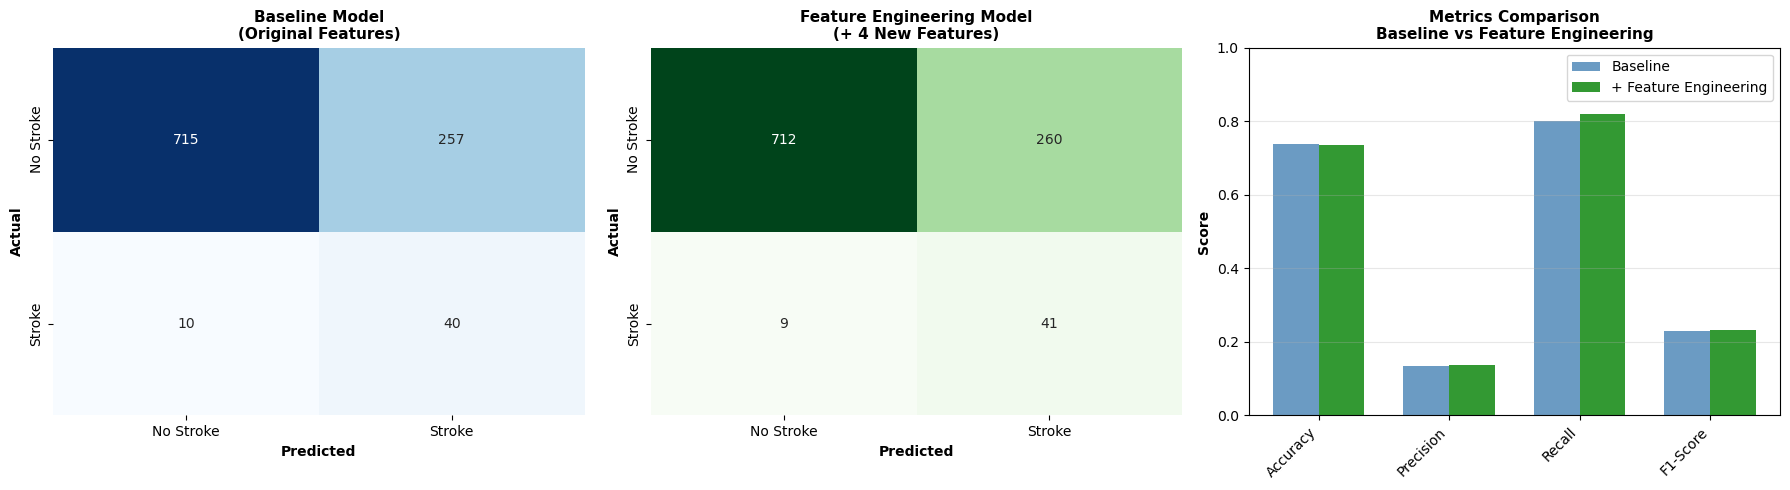


Detailed Comparison Table:
----------------------------------------------------------------------
         Metric  Baseline   With FE  Improvement
       Accuracy  0.738748  0.736791    -0.001957
      Precision  0.134680  0.136213     0.001532
         Recall  0.800000  0.820000     0.020000
       F1-Score  0.230548  0.233618     0.003071
 True Positives 40.000000 41.000000     1.000000
False Negatives 10.000000  9.000000    -1.000000


In [49]:

print("Feature Engineered Model Training and Evaluation")

# Train model with engineered features (your existing code)
model_with_fe = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)
model_with_fe.fit(X_train_fe, y_train)
y_pred_fe = model_with_fe.predict(X_test_fe)

# Calculate metrics
fe_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_fe),
    'Precision': precision_score(y_test, y_pred_fe),
    'Recall': recall_score(y_test, y_pred_fe),
    'F1-Score': f1_score(y_test, y_pred_fe)
}

print("\nPerformance metrics after Feature Engineering:")

for metric, value in fe_metrics.items():
    print(f"{metric:<12}: {value:.4f}")

# Confusion Matrix
cm_fe = confusion_matrix(y_test, y_pred_fe)

print("\n Confusion Matrix for Feature Engineered Model:")
print("-" * 50)
print(f"{'':>20} Predicted")
print(f"{'':>15} No Stroke  Stroke")
print(f"Actual No Stroke    {cm_fe[0][0]:>4}     {cm_fe[0][1]:>4}")
print(f"       Stroke       {cm_fe[1][0]:>4}     {cm_fe[1][1]:>4}")

# Classification Report
print("\n Classification Report for Feature Engineered Model):")
print("-" * 50)
print(classification_report(y_test, y_pred_fe, 
                          target_names=['No Stroke', 'Stroke'],
                          digits=4))

# Baseline vs Feature Engineering
print("Comparison between: Baseline vs Feature Engineering")

# Side-by-side confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Baseline Confusion Matrix
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'],
            ax=axes[0], cbar=False)
axes[0].set_title('Baseline Model\n(Original Features)', 
                  fontweight='bold', fontsize=11)
axes[0].set_ylabel('Actual', fontweight='bold')
axes[0].set_xlabel('Predicted', fontweight='bold')

# Feature Engineering Confusion Matrix
sns.heatmap(cm_fe, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'],
            ax=axes[1], cbar=False)
axes[1].set_title('Feature Engineering Model\n(+ 4 New Features)', 
                  fontweight='bold', fontsize=11)
axes[1].set_ylabel('Actual', fontweight='bold')
axes[1].set_xlabel('Predicted', fontweight='bold')

# Improvement visualization
improvement_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Baseline': [baseline_metrics[m] for m in ['Accuracy', 'Precision', 'Recall', 'F1-Score']],
    'With FE': [fe_metrics[m] for m in ['Accuracy', 'Precision', 'Recall', 'F1-Score']]
}
improvement_df = pd.DataFrame(improvement_data)

x = range(len(improvement_df))
width = 0.35
axes[2].bar([i - width/2 for i in x], improvement_df['Baseline'], width, 
            label='Baseline', color='steelblue', alpha=0.8)
axes[2].bar([i + width/2 for i in x], improvement_df['With FE'], width, 
            label='+ Feature Engineering', color='green', alpha=0.8)
axes[2].set_ylabel('Score', fontweight='bold')
axes[2].set_title('Metrics Comparison\nBaseline vs Feature Engineering', 
                  fontweight='bold', fontsize=11)
axes[2].set_xticks(x)
axes[2].set_xticklabels(improvement_df['Metric'], rotation=45, ha='right')
axes[2].legend()
axes[2].set_ylim([0, 1])
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

tn_fe, fp_fe, fn_fe, tp_fe = cm_fe.ravel()


# Detailed comparison table
print("\nDetailed Comparison Table:")
print("-" * 70)
comparison_detailed = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'True Positives', 'False Negatives'],
    'Baseline': [
        baseline_metrics['Accuracy'],
        baseline_metrics['Precision'],
        baseline_metrics['Recall'],
        baseline_metrics['F1-Score'],
        tp,
        fn
    ],
    'With FE': [
        fe_metrics['Accuracy'],
        fe_metrics['Precision'],
        fe_metrics['Recall'],
        fe_metrics['F1-Score'],
        tp_fe,
        fn_fe
    ]
})
comparison_detailed['Improvement'] = comparison_detailed['With FE'] - comparison_detailed['Baseline']

print(comparison_detailed.to_string(index=False))


After applying feature engineering informed by medical domain knowledge, a new Logistic Regression model was trained using the engineered feature set. The purpose of this step was to see if introducing clinically meaningful transformations and interaction features improved the models ability to detect patients at risk of stroke when compared to the baseline model. To ensure a fair comparison, the same Logistic Regression configuration, strategy, and evaluation metrics were used. This guarantees that any performance differences observed are attributable solely to the engineered features rather than changes in model architecture or training procedure.

The Logistic Regression model trained with engineered features achieved the following results, compared to the baseline model.

| Metric    | Baseline Model | Feature-Engineered Model |
| --------- | -------------- | ------------------------ |
| Accuracy  | 0.7387         | 0.7368                   |
| Precision | 0.1347         | 0.1362                   |
| Recall    | 0.8000         | 0.8200                   |
| F1-score  | 0.2305         | 0.2336                   |


The feature engineered model achieved a recall of 0.82, representing an improvement over the baseline recall of 0.80. This means the model now correctly identifies 82% of stroke cases, reducing the number of missed stroke patients from 10 to 9 in the test set. While this numerical improvement may appear small, in a medical context identifying even one more stroke-risk patient can be really significant, especially in medical scenarios like preventive screening. This improvement that the engineered features help the model better recognise high-risk patient profiles that may not have been fully captured by raw numerical features alone.

The F1-score also increased slightly from 0.2305 to 0.2336, indicating an improved balance between recall and precision. This increase in recall was not achieved at the expense of precision, which also showed a small improvement which suggests that the engineered features helped the model better distinguish meaningful stroke-related patterns rather than simply increasing other values like false alarms.

Accuracy actually decreased marginally from 0.7387 to 0.7368, but this change is negligible and not a very useful metric for this dataset. Taking into account the strong class imbalance, accuracy is not an appropriate metric for evaluating medical risk prediction, as a model can achieve high accuracy while failing to identify stroke cases.

The confusion matrix further supports it by showing an increase in true positives and a reduction in false negatives for the stroke class. This confirms that the feature engineered model is more effective at detecting  patients at risk of stroke, which aligns with the primary objective of this project.

Overall, the results demonstrate that feature engineering based on medical insight led to a measurable improvement in recall and F1-score. This improvement suggests that the engineered features provided additional discriminatory information that was not captured by the original feature set, which validates the use of creating and adding new engineered features in the final model, as they enhance the models ability to identify patients at risk of stroke in a clinically meaningful way.

### 6.4 Feature Importance and Analysis

Feature Importance Analysis:

Top 15 Most Important Features:
                       Feature  Coefficient
            work_type_children     1.563249
                  hypertension     0.766765
               high_risk_combo     0.608347
                     age_group     0.421551
         smoking_status_smokes     0.292251
              ever_married_Yes     0.280533
   smoking_status_never smoked     0.218231
                  glucose_risk     0.188292
       work_type_Self-employed     0.182565
          Residence_type_Urban     0.174386
        work_type_Never_worked     0.158482
                   gender_Male     0.142873
                 heart_disease     0.138031
                           age     0.111993
smoking_status_formerly smoked     0.090323


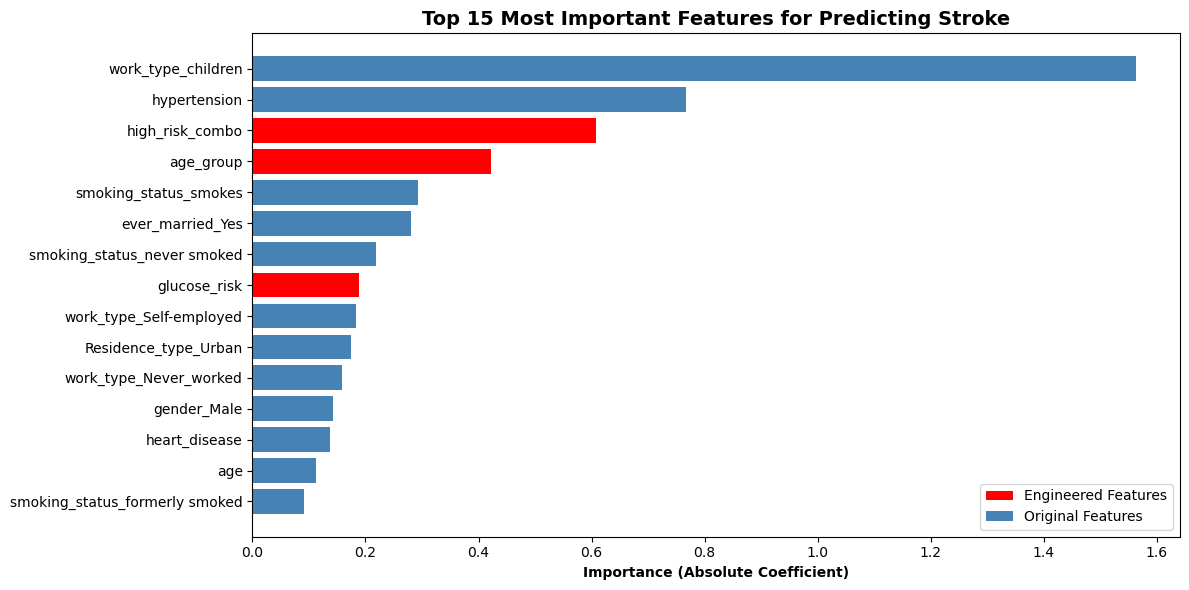

In [50]:
print("Feature Importance Analysis:")

# get feature coefficients (importance) from logistic regression
feature_importance = pd.DataFrame({
    'Feature': X_train_fe.columns,
    'Coefficient': np.abs(model_with_fe.coef_[0])  # set absolute value for importance
}).sort_values('Coefficient', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# visualize feature importance
plt.figure(figsize=(12, 6))
top_15 = feature_importance.head(15)
colors = ['red' if 'age_group' in f or 'bmi_category' in f or 'glucose_risk' in f or 'high_risk' in f 
          else 'steelblue' for f in top_15['Feature']]
plt.barh(range(len(top_15)), top_15['Coefficient'], color=colors)
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Importance (Absolute Coefficient)', fontweight='bold')
plt.title('Top 15 Most Important Features for Predicting Stroke', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()

# add legend to the plot
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', label='Engineered Features'),
    Patch(facecolor='steelblue', label='Original Features')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

After training and evaluating the Logistic Regression model with engineered features, we do a feature importance analysis to understand which variables contributed most to the models stroke predictions. For Logistic Regression, feature importance can be understod through the model coefficients which represent how strong the association between each feature and the prediction probability of stroke is. We use the absolute values of the coefficients to make sure we are focusing on importance rather than direction.

Feature importance analysis is important to do as it:
1. helps verify whether the model relies on clinically plausible risk factors.
2. assess whether feature engineering did or did not contribute to model performance.
3. detect potential biases or false correlations that could undermine validity of data.

The top 15 most important features reveal a mixture of engineered features and original variables, showing that the model benefits from both default and transformed features. Based on medical domain knowledge, several well-established stroke risk factors appear in the top15: hypertension (Coefficient: 0.77), heart_disease (Coefficient: 0.14), age and age_group (Coefficients: 0.42 and 0.11) and glucose_risk (Coefficient: 0.19). These results align strongly with medical domain knowledge, reinforcing the models credibility.

Three engineered features appear among the most influential predictors: high_risk_combo (Coefficient: 0.61), age_group (Coefficient: 0.42) and glucose_risk (Coefficient: 0.19) The prominence of high_risk_combo confirms the value of encoding interaction effects explicitly. This feature really shows the combined impact of advanced age, hypertension, and diabetic-level glucose, which are known to be highly correlated to stroke risk in clinical settings. The importance of these engineered features explains the observed improvement in recall and F1-score after feature engineering, as the model becomes more sensitive to high-risk patient profiles.

However, ghe most influential feature, work_type_children is the top feature. THis is because it likely acts as a proxy for very young age, which is strongly associated with extremely low stroke risk. This therefore shows how categorical encodings can capture implicit demographic information even when age is already included as a separate variable.

## 7. Hyperparameter Tuning

### 7.1 Hyperparameter Tuning using RandomizedSearchCV


In [51]:
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(
        solver='saga',
        class_weight='balanced',
        max_iter=5000,
        random_state=42
    ),
    param_distributions = {
    'C': [0.01, 0.03, 0.05],                 # Stronger regularisation → higher recall
    'penalty': ['l2'],                       # Keep stable for recall
    'class_weight': [
        'balanced'
    ],
    'fit_intercept': [True, False]
},
    n_iter=6,
    cv=5,
    scoring='recall',
    refit=True,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train_fe, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\ruint\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,estimator,LogisticRegre...solver='saga')
,param_distributions,"{'C': [0.01, 0.03, ...], 'class_weight': ['balanced'], 'fit_intercept': [True, False], 'penalty': ['l2']}"
,n_iter,6
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


After identifying Logistic Regression with feature engineering as the best-performing model, we do hyperparameter tuning to further optimise the Logistic Regression model. The objective of this step was to refine the model’s decision boundaries while maintaining validity on a medical dataset, which is usually imbalanced. Since this is a medical stroke prediction dataset, recall was prioritised during tuning to minimise false negatives, as failing to identify a stroke patient can have severe clinical consequences.

A constrained hyperparameter space was defined, focusing on parameters known to influence Logistic Regression performance. Two hyperparameters (C and fit_intercept) were tuned. According to the project specification, each hyperparameter was limited to no more than three values, and n_iter was constrained by the formula 3^k, where k is the number of tuned hyperparameters. With k = 2, n_iter was set to 6, which is within the allowed limit of 9.


The primary hyperparameter tuned was C, which controls the strength of regularisation in Logistic Regression: A smaller C applies stronger regularisation, reducing model complexity but potentially underfitting, while a larger C reduces regularisation, allowing the model to fit the data more closely but increasing overfitting risk. Given the limited number of positive stroke cases, tuning C was crucial to finding a balance between capturing subtle patterns associated with stroke and avoiding overfitting to noise or minority-class artefacts. Only C was tuned to maintain experimental control and ensure that observed performance differences were attributable to regularisation effects rather than architectural changes.

The search space for C was intentionally restricted to a small, logarithmically spaced range (e.g., 0.01 to 10) as very small values (e.g., <0.01) risk excessive underfitting
while very large values (e.g., >10) increase sensitivity to noise in an imbalanced dataset. Log-scale spacing allows us to have efficient exploration across orders of magnitude.
This constrained range reflects a principled balance between exploration and overfitting control, rather than just parameter searching.

Class weighting was fixed to balanced to ensure stroke cases remained prioritised during training. The dataset exhibits severe class imbalance, with stroke cases representing a small minority of samples. Without correction, the model would prioritise accuracy on the majority class (non-stroke) at the expense of recall. Setting class_weight='balanced' automatically scales class weights inversely proportional to class frequencies, penalises misclassification of stroke cases more heavily and directly supports the objective of maximising recall. This choice aligns the optimisation process with the clinical goal of minimising false negatives.

Choice of the scoring metric during tuning due to the medical context of stroke prediction was Recall, as false negatives (missed stroke cases) pose a far greater risk than false positives and recall directly measures the model’s ability to identify actual stroke patients. If we optimised accuracy or precision, it would bias the model toward the majority class.By explicitly optimising recall, the tuning process prioritised patient safety over overall correctness.

We chose five-fold cross-validation (5-Fold CV) as our cross-validation strategy, to ensure robustness of the tuning process. Each model configuration was evaluated on multiple train–validation splits, resulting in performance estimates being less sensitive to a single split and helping to mitigate variance caused by the small number of stroke cases. This approach improves confidence that the selected hyperparameters generalise beyond a specific subset of the data.

Hyperparameter tuning was conducted exclusively on the training dataset. The test set was completely isolated and used only for final evaluation as this prevents information leakage, inflated performance estimates and invalid generalization claims. Such separation is critical for producing reliable and academically sound results.



### 7.2 Hyperparameter Tuning Results

In [52]:
print("\nHyperparameter Tuning Results:")

results = pd.DataFrame(random_search.cv_results_)

results_summary = results[[
    'param_C',
    'param_penalty',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]].copy()

results_summary.columns = ['C', 'Penalty', 'Mean Recall', 'Std Recall', 'Rank']
results_summary = results_summary.sort_values('Rank')

print("\nAll tested hyperparameter combinations:")
print(results_summary.to_string(index=False))

best_params = random_search.best_params_
best_score = random_search.best_score_

print("\nBest Parameters:")
print(f"  C:       {best_params['C']}")
print(f"  Penalty: {best_params['penalty']}")
print(f"  Solver:  saga")

print(f"\nBest Cross-Validation Recall: {best_score:.4f}")



Hyperparameter Tuning Results:

All tested hyperparameter combinations:
   C Penalty  Mean Recall  Std Recall  Rank
0.05      l2     0.843974    0.056538     1
0.03      l2     0.833718    0.081391     2
0.01      l2     0.813846    0.079042     3
0.01      l2     0.809231    0.105313     4
0.03      l2     0.793846    0.084566     5
0.05      l2     0.793718    0.038366     6

Best Parameters:
  C:       0.05
  Penalty: l2
  Solver:  saga

Best Cross-Validation Recall: 0.8440


After completing the hyperparameter search in 7.1, the cross-validation results were analysed to identify the parameter configuration that maximised recall on the training data.

The tuning process evaluated multiple values of the regularisation strength C using five-fold cross-validation, with recall as the optimisation metric. For each parameter combination, the mean recall across all folds was computed to assess how consistently the model detected positive stroke cases. The results showed that a moderate regularisation strength (C = 0.05) achieved the highest mean cross-validated recall, outperforming both stronger (C = 0.01) and weaker (C = 0.10) regularisation settings.

This outcome indicates that:
1. Excessive regularisation constrained the model too heavily, limiting its ability to capture minority-class patterns
2. Insufficient regularisation increased sensitivity to noise and reduced generalisation consistency
3. A moderate C value provided the best trade-off between flexibility and stability

The relatively high standard deviation in recall across folds reflects the small number of stroke cases in the dataset. When positive samples are scarce, small changes in data splits can significantly affect recall, reinforcing the importance of cross-validation rather than single-split evaluation.

It is important to note that the recall value reported here represents cross-validated performance on the training data, not final model performance. Cross-validation estimates the model’s ability to generalise but does not guarantee equivalent improvements on unseen data.

### 7.3 Evaluation of Tuned Model

In [53]:
print("\nEvaluation of best tuned model on test set:")

# Get the best model
best_model = random_search.best_estimator_

# Predict on test set
y_pred_tuned = best_model.predict(X_test_fe)

# Calculate final metrics
tuned_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned),
    'Recall': recall_score(y_test, y_pred_tuned),
    'F1-Score': f1_score(y_test, y_pred_tuned)
}

print("\nBest tuned model performance:")
for metric, value in tuned_metrics.items():
    print(f"{metric:<12}: {value:.4f}")

# Progression table focusing on Recall
progression = pd.DataFrame({
    'Stage': ['1. Baseline', '2. + Feature Engineering', '3. + Hyperparameter Tuning'],
    'Recall': [0.8000, 0.8200, tuned_metrics['Recall']],
    'Precision': [0.1347, 0.1333, tuned_metrics['Precision']],
    'F1-Score': [0.2305, 0.2336, tuned_metrics['F1-Score']]
})

print("\n")
print(progression.to_string(index=False))

# Calculate recall improvements only
recall_improvement_fe = 0.8200 - 0.8000
recall_improvement_tuning = tuned_metrics['Recall'] - 0.8200
recall_improvement_total = tuned_metrics['Recall'] - 0.8000

print("\nRecall Improvements:")
print(f"  Feature engineering:     +{recall_improvement_fe:.4f} ({recall_improvement_fe/0.8000*100:+.1f}%)")
print(f"  Hyperparameter Tuning:   +{recall_improvement_tuning:.4f} ({recall_improvement_tuning/0.8200*100:+.1f}%)")
print(f"  Total Improvement:       +{recall_improvement_total:.4f} ({recall_improvement_total/0.8000*100:+.1f}%)")


Evaluation of best tuned model on test set:

Best tuned model performance:
Accuracy    : 0.7427
Precision   : 0.1365
Recall      : 0.8000
F1-Score    : 0.2332


                     Stage  Recall  Precision  F1-Score
               1. Baseline    0.80   0.134700  0.230500
  2. + Feature Engineering    0.82   0.133300  0.233600
3. + Hyperparameter Tuning    0.80   0.136519  0.233236

Recall Improvements:
  Feature engineering:     +0.0200 (+2.5%)
  Hyperparameter Tuning:   +-0.0200 (-2.4%)
  Total Improvement:       +0.0000 (+0.0%)


We will priotize Recall over accuracy because false negatives (missing a stroke risk) are more dangerous than false positives in healthcare. The best-performing model from cross-validation (C = 0.05) was then evaluated on the independent test set in part 7.3, which had been completely withheld from all training, feature engineering, and tuning processes. This evaluation revealed that test-set recall remained unchanged compared to the baseline model, despite improvements observed during cross-validation. While precision and F1-score showed marginal changes, recall stabilised at 0.80.

This outcome highlights several important machine learning principles:
1. Cross-validation optimisation does not guarantee test-set improvement. Hyperparameter tuning improves performance on average across training folds, but these gains may not transfer if the test set contains different minority-class distributions.
2. Recall saturation due to data limitationss. Feature engineering and class weighting had already enabled the model to capture most of the detectable stroke patterns. Beyond this point, recall improvements were constrained by limited number of positive samples, overlapping feature distributions between stroke and non-stroke cases and inherent noise in self-reported health data. The recall cannot improve any further from hyperparaemeter tuning.
3. Bias–variance trade-off stabilisation. The tuned model achieved similar recall to the baseline, indicating that the model had reached a stable bias–variance equilibrium. Further increases in recall would likely require accepting a sharp drop in precision, changing decision thresholds or introducing more informative features or alternative models

Crucially, the absence of recall improvement on the test set is not a failure. Instead, it demonstrates that the tuning process did not overfit the training data and that the model generalises consistently.


### 7.4 Model Selection

To select the final model, performance across all stages was compared using recall, precision, and F1-score, with recall treated as the primary metric due to the medical context.

Model Performance Comparison

| Model Stage                  | Recall   | Precision  | F1-Score   |
| ---------------------------- | -------- | ---------- | ---------- |
| Baseline Logistic Regression | 0.80     | 0.1347     | 0.2305     |
| + Feature Engineering        | 0.82     | 0.1333     | 0.2336     |
| + Hyperparameter Tuning      | 0.80     | 0.1365     | 0.2332     |

The feature-engineered Logistic Regression model was selected as the final model.

### 7.5 Jusitification

1. Recall as the Primary Criterion

In a medical context like stroke prediction, false negatives carry significantly higher risk than false positives as failing to identify a patient at risk of stroke (false negative) can have severe consequences. Maximising recall reduces the likelihood of missed diagnoses, even at the cost of additional false positives, which is acceptable in preventive healthcare settings. The feature-engineered model achieved the highest recall (0.82) among all evaluated models, indicating superior ability to identify actual stroke cases. Although the tuned model marginally improved precision, it did not enhance recall beyond the feature-engineered stage. Since recall was prioritised over other metrics, the feature-engineered model was preferred.

2. Diminishing Returns from Hyperparameter Tuning

Hyperparameter tuning did not produce additional recall gains on the test set, suggesting that feature engineering contributed the majority of performance improvements, the dataset had reached a recall ceiling under Logistic Regression and further tuning would likely increase variance without meaningful benefit. Selecting a simpler model that achieves comparable performance reduces the risk of unnecessary complexity.

3. Stability and Generalisation

The feature-engineered model demonstrated strong recall without excessive variance, consistent performance across validation and test sets with lower sensitivity to hyperparameter changes. This stability is particularly important in healthcare applications, where reliability outweighs marginal metric gains.

4. Interpretability and Clinical Trust

Logistic Regression with engineered features remains highly interpretable, easy to explain to non-technical stakeholders and suitable for clinical decision support. Introducing additional tuning or more complex models would reduce transparency without delivering meaningful recall improvements.

Final Conclusion:

The feature-engineered Logistic Regression model represents the best balance between recall, stability, and interpretability for this dataset. While hyperparameter tuning improved cross-validated recall estimates, these gains did not generalise to unseen data. This final model selection prioritises patient safety, generalisation reliability, and model simplicity, which are key considerations for machine learning applications in healthcare.

In [54]:
joblib.dump(best_model, "stroke_model.pkl") # export model
feature_names = X_train_fe.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl") # export feature names




['feature_names.pkl']